Download links:
- French NFI : https://inventaire-forestier.ign.fr/dataifn/ 
- French NFI mortality by Pascal Schneider : https://drive.google.com/drive/u/0/folders/1RJAeulXUP8Kz75zfx8qdZZk6zp2M6QC_

# Method :

1. Use mortality data (nat or cut) to enhance the classification of the NFI

In [1]:
import geopandas as gpd

nfi = gpd.read_parquet('../data/processed_datasets/simplified_NFI_2003-2021_EPSG2154_FR.parquet')

import pandas as pd
mortality = pd.read_csv('/Users/arthurcalvi/Data/Disturbances_maps/IF/PascalSchneider/20240113-nfi_mortality.csv')
mortality = mortality[ mortality.mort_nat_stems_prc_yr != 0 ]
placette = pd.read_csv('/Users/arthurcalvi/Data/Disturbances_maps/IF/france/export_dataifn_2005_2021/PLACETTE.csv', delimiter=';')

/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_4867/384702506.py:8: DtypeWarning: Columns (15,16,18,24,25,26,27,28,32,36,39,40,41,42,44,49,52) have mixed types. Specify dtype option on import or set low_memory=False.
  placette = pd.read_csv('/Users/arthurcalvi/Data/Disturbances_maps/IF/france/export_dataifn_2005_2021/PLACETTE.csv', delimiter=';')


In [2]:
placette

,CAMPAGNE,VISITE,IDP,XL,YL,DEP,SER,DPYR,ANPYR,PBUIS,...,ANDAIN,BORD,INTEGR,TM2,TFORM,SVER,SFO,CAM,DC,Unnamed: 56
0,2005,1,19,9.038723e+05,6.804836e+06,88,C20,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN
1,2005,1,23,1.004318e+06,6.863931e+06,57,C30,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN
2,2005,1,27,8.493820e+05,6.743346e+06,52,C20,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN
3,2005,1,41,9.597751e+05,6.334750e+06,04,H30,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN
4,2005,1,45,3.934171e+05,6.221638e+06,64,I21,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181935,2021,1,1654911,8.846937e+05,6.666100e+06,39,C20,NaN,NaN,0.0,...,0.0,0.0,0,NaN,2.0,6.0,NaN,NaN,0.0,NaN
181936,2021,1,1654915,1.219914e+06,6.153678e+06,2B,K13,NaN,NaN,0.0,...,0.0,0.0,0,NaN,2.0,5.0,NaN,NaN,0.0,NaN
181937,2021,1,1654926,8.971492e+05,6.254372e+06,13,J23,NaN,NaN,0.0,...,0.0,0.0,0,NaN,2.0,NaN,NaN,2.0,0.0,NaN
181938,2021,1,1654932,7.479120e+05,6.325570e+06,30,G70,NaN,NaN,0.0,...,0.0,0.0,0,NaN,2.0,3.0,NaN,NaN,0.0,NaN


In [3]:
mortality

,idp,mort_tot_stems_prc_yr_esq,mort_nat_stems_prc_yr_esq,mort_cut_stems_prc_yr_esq,mort_tot_stems_prc_yr,mort_nat_stems_prc_yr,mort_cut_stems_prc_yr,mort_tot_ba_yr,mort_tot_ba_prc_yr,mort_nat_ba_yr,mort_nat_ba_prc_yr,mort_cut_ba_yr,mort_cut_ba_prc_yr,mort_tot_vol_yr,mort_tot_vol_prc_yr,mort_nat_vol_yr,mort_nat_vol_prc_yr,mort_cut_vol_yr,mort_cut_vol_prc_yr
3,500013,4.902061,1.136659,3.580750,4.444444,1.111111,3.333333,0.498419,1.113848,0.219178,0.489811,0.279241,0.624038,0.053287,0.706480,0.031735,0.420742,0.021552,0.285738
9,500137,1.471230,1.471230,0.000000,1.428571,1.428571,0.000000,0.291805,1.342332,0.291805,1.342332,0.000000,0.000000,0.030404,1.042768,0.030404,1.042768,0.000000,0.000000
16,500214,1.981769,1.981769,0.000000,1.904762,1.904762,0.000000,0.097349,0.211018,0.097349,0.211018,0.000000,0.000000,0.005765,0.085146,0.005765,0.085146,0.000000,0.000000
22,500284,12.944944,2.085164,9.711955,10.000000,2.000000,8.000000,1.771419,5.635379,0.054794,0.174317,1.716624,5.461062,0.287158,4.875333,0.004842,0.082204,0.282316,4.793128
28,500331,1.075519,1.075519,0.000000,1.052632,1.052632,0.000000,0.054794,0.044271,0.054794,0.044271,0.000000,0.000000,0.002581,0.012555,0.002581,0.012555,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45002,1231337,5.591249,5.591249,0.000000,5.000000,5.000000,0.000000,0.162304,1.320869,0.162304,1.320869,0.000000,0.000000,0.013575,0.874058,0.013575,0.874058,0.000000,0.000000
45006,1231349,0.813116,0.813116,0.000000,0.800000,0.800000,0.000000,0.046689,0.171479,0.046689,0.171479,0.000000,0.000000,0.002596,0.055979,0.002596,0.055979,0.000000,0.000000
45010,1231381,3.035973,3.035973,0.000000,2.857143,2.857143,0.000000,0.058654,0.136293,0.058654,0.136293,0.000000,0.000000,0.004386,0.049313,0.004386,0.049313,0.000000,0.000000
45015,1231395,5.924857,5.924857,0.000000,5.263158,5.263158,0.000000,0.324280,2.339798,0.324280,2.339798,0.000000,0.000000,0.028816,1.969145,0.028816,1.969145,0.000000,0.000000


In [4]:
import pandas as pd

# Assuming you have the placette and mortality DataFrames already loaded.

# Step 1: Aggregate placette to calculate start_date, end_date, and number of visits
placette_agg = placette.groupby('IDP').agg(
    start_date=('CAMPAGNE', 'min'),
    end_date=('CAMPAGNE', 'max'),
    num_visits=('CAMPAGNE', 'count'), 
    XL=('XL', 'first'),  # Assuming 'XL' does not change between visits
    YL=('YL', 'first')   # Assuming 'YL' does not change between visits
).reset_index()

# Step 2: Filter out placettes with only one visit
placette_filtered = placette_agg[placette_agg.num_visits > 1].drop(columns=['num_visits'])

# Step 3: Merge the aggregated and filtered placette with mortality
result = pd.merge(mortality, placette_filtered, how='left', left_on='idp', right_on='IDP')[['mort_tot_stems_prc_yr_esq', 'mort_nat_stems_prc_yr_esq', 'mort_cut_stems_prc_yr_esq', 'IDP', 'XL', 'YL', 'start_date', 'end_date']]

# Optional: Remove rows with NaN in start_date or end_date if you want only matched rows
result_filtered = result.dropna(subset=['start_date', 'end_date'])

from shapely.geometry import Point

# Assuming 'result_filtered' is your final DataFrame from the previous steps

# Step 1: Create a GeoSeries from the 'XL' and 'YL' columns
geometry = [Point(xy) for xy in zip(result_filtered['XL'], result_filtered['YL'])]
geo_df = gpd.GeoDataFrame(result_filtered, geometry=geometry, crs="EPSG:2154")




In [5]:
geo_df_filtered = geo_df[ geo_df.mort_tot_stems_prc_yr_esq > 25]
# Assuming 'geo_df' is your GeoDataFrame from the previous steps

# Add a new column 'classification' based on the condition
geo_df_filtered['class'] = geo_df.apply(
    lambda row: 'Mortality' if row['mort_nat_stems_prc_yr_esq'] > row['mort_cut_stems_prc_yr_esq'] else 'Anthropogenic', 
    axis=1
)


/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


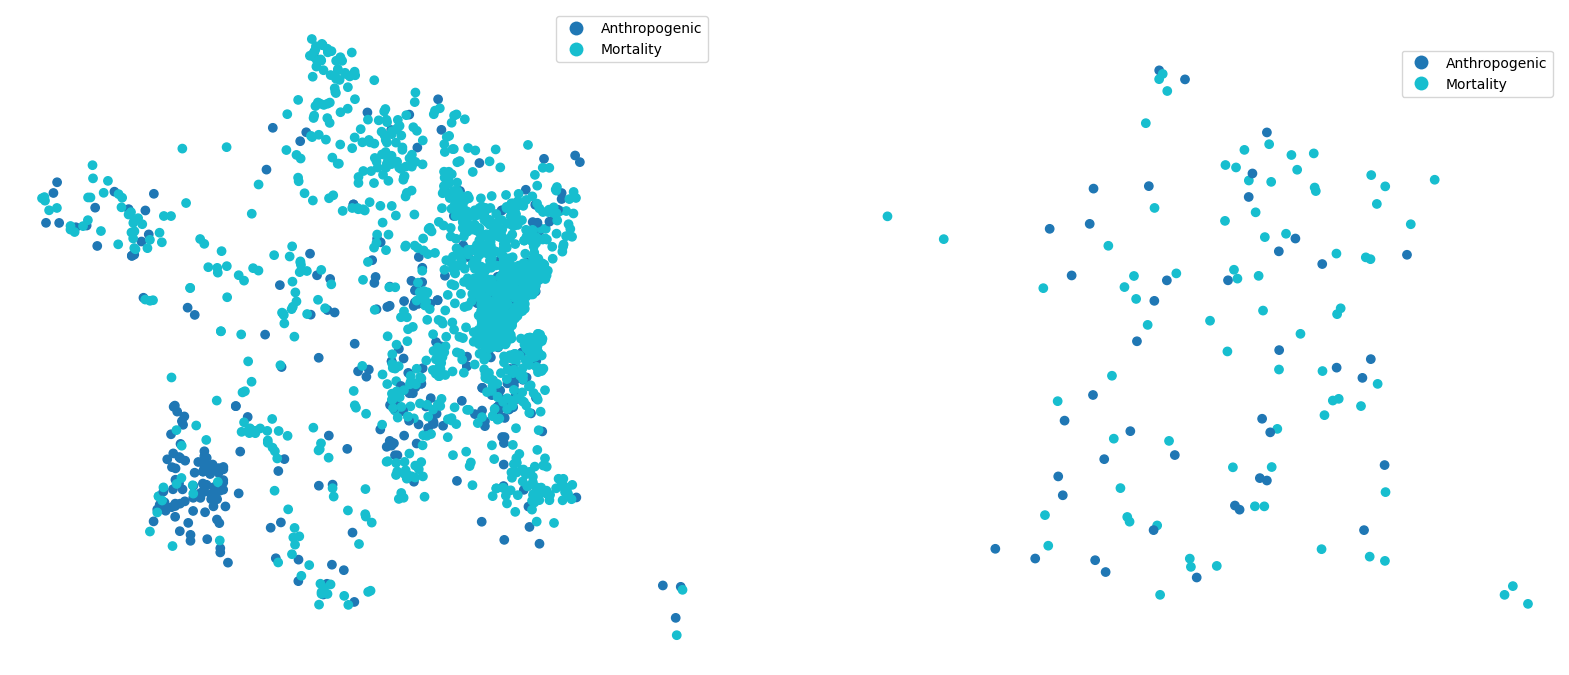

In [6]:
sub_nfi = nfi[ (nfi['class'] == 'Anthropogenic') | (nfi['class'] == 'Mortality')]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sub_nfi.plot(ax=ax[0], column='class', legend=True)
geo_df_filtered.plot(ax=ax[1], column='class', legend=True) 

for a in ax:
    a.set_axis_off()

In [9]:
# Assuming geo_df_filtered and nfi are your GeoDataFrames and both have an 'IDP' column
#convert nfi start_date and end_date to datetime
nfi['start_date'] = pd.to_datetime(nfi['start_date'])
nfi['end_date'] = pd.to_datetime(nfi['end_date'])
geo_df_filtered['start_date'] = pd.to_datetime(geo_df_filtered['start_date'])
geo_df_filtered['end_date'] = pd.to_datetime(geo_df_filtered['end_date'])
common_df = geo_df_filtered.merge(nfi, on='IDP', suffixes=('_geo', '_nfi'))

# Compare classification
common_df['classification_match'] = common_df['class_geo'] == common_df['class_nfi']

# Compare start dates
common_df['start_date_match'] = common_df['start_date_geo'] == common_df['start_date_nfi']

# Compare end dates
common_df['end_date_match'] = common_df['end_date_geo'] == common_df['end_date_nfi']

# Optionally, check if the date ranges overlap
# This step requires more logic, as you'll need to compare the start and end dates of both ranges
def check_overlap(row):
    return not (row['end_date_geo'] < row['start_date_nfi'] or row['start_date_geo'] > row['end_date_nfi'])

common_df['date_overlap'] = common_df.apply(check_overlap, axis=1)



/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [10]:
common_df

,mort_tot_stems_prc_yr_esq,mort_nat_stems_prc_yr_esq,mort_cut_stems_prc_yr_esq,IDP,XL,YL,start_date_geo,end_date_geo,geometry_geo,class_geo,...,end_date_nfi,geometry_nfi,intensity,class_nfi,tree_type,essence,classification_match,start_date_match,end_date_match,date_overlap
0,39.163566,1.725173,30.117288,511880.0,4.454291e+05,6.351075e+06,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002015,POINT (445429.068 6351074.560),Anthropogenic,...,2010-12-28,POINT (445429.068 6351074.560),1.0,Other,Conifer,Maritime Pine,False,False,False,False
1,30.117288,7.789209,12.944944,532675.0,3.308003e+05,6.260110e+06,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002015,POINT (330800.303 6260109.981),Anthropogenic,...,2010-12-28,POINT (330800.303 6260109.981),2.0,Storm,Broadleaf,Chestnut,False,False,False,False
2,30.117288,30.117288,0.000000,808964.0,7.731889e+05,6.831937e+06,1970-01-01 00:00:00.000002013,1970-01-01 00:00:00.000002018,POINT (773188.941 6831936.934),Mortality,...,2013-12-28,POINT (773188.941 6831936.934),1.0,Other,Broadleaf,European Ash,False,False,False,False
3,25.127521,25.127521,0.000000,867977.0,9.805328e+05,6.540377e+06,1970-01-01 00:00:00.000002013,1970-01-01 00:00:00.000002018,POINT (980532.831 6540376.779),Mortality,...,2013-12-28,POINT (980532.831 6540376.779),1.0,Mortality,Broadleaf,Chestnut,True,False,False,False
4,28.451546,12.944944,7.219963,1010535.0,9.104976e+05,6.761808e+06,1970-01-01 00:00:00.000002015,1970-01-01 00:00:00.000002020,POINT (910497.571 6761808.424),Mortality,...,2015-12-28,POINT (910497.571 6761808.424),2.0,Storm,Broadleaf,Hornbeam,False,False,False,False
5,28.451546,12.944944,7.219963,1010535.0,9.104976e+05,6.761808e+06,1970-01-01 00:00:00.000002015,1970-01-01 00:00:00.000002020,POINT (910497.571 6761808.424),Mortality,...,2020-12-28,POINT (910497.571 6761808.424),2.0,Storm,Broadleaf,Hornbeam,False,False,False,False
6,100.000000,100.000000,0.000000,1102265.0,8.868005e+05,6.562166e+06,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000002021,POINT (886800.457 6562165.978),Mortality,...,2016-12-28,POINT (886800.457 6562165.978),1.0,Other,Broadleaf,Hornbeam,False,False,False,False
7,100.000000,100.000000,0.000000,1102265.0,8.868005e+05,6.562166e+06,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000002021,POINT (886800.457 6562165.978),Mortality,...,2021-12-28,POINT (886800.457 6562165.978),1.0,Other,Broadleaf,Hornbeam,False,False,False,False
8,32.866434,1.888150,25.645122,1102628.0,6.531624e+05,7.057831e+06,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000002021,POINT (653162.422 7057831.443),Anthropogenic,...,2016-12-28,POINT (653162.422 7057831.443),2.0,Mortality,Broadleaf,Sycamore Maple,False,False,False,False
9,30.868890,30.868890,0.000000,1110469.0,8.754336e+05,6.868041e+06,1970-01-01 00:00:00.000002016,1970-01-01 00:00:00.000002021,POINT (875433.571 6868040.544),Mortality,...,2016-12-28,POINT (875433.571 6868040.544),4.0,Other,Broadleaf,Silver Birch,False,False,False,False


There are only twenty plot in common between the two methods. I will just replace the plots present in both by the plots in the mortality data.

In [14]:
# Create a temporary DataFrame with only the IDP and specified columns from nfi
nfi_specific_cols = nfi[['IDP', 'intensity', 'tree_type', 'essence']]

# Merge these specific columns into geo_df_filtered, this operation will not affect the original geo_df_filtered DataFrame yet
geo_df_temp = geo_df_filtered.merge(nfi_specific_cols, on='IDP', how='left', suffixes=('', '_nfi'))

# If necessary, overwrite geo_df_filtered columns with nfi values for the specified columns
# for col in ['intensity', 'tree_type', 'essence']:
#     geo_df_temp[col] = geo_df_temp[f'{col}_nfi'].fillna(geo_df_temp[col])

# Identify common IDPs
common_idps = nfi['IDP'].isin(geo_df_temp['IDP'])

# Remove rows with matching IDPs from nfi
nfi_filtered = nfi[~common_idps]

# Concatenate nfi_filtered with the updated rows from geo_df_temp
nfi_updated = pd.concat([nfi_filtered, geo_df_temp[nfi.columns]], ignore_index=True, sort=False)


In [16]:
#save the updated nfi
nfi_updated.to_parquet('../data/processed_datasets/simplified_PascalSchneider_NFI_2003-2021_EPSG2154_FR.parquet')